Student Information:


Kasey Clark


Miguel Rosales


Lalitha Gorantla


Vinuthna Ghattamaneni

#Pocket Algorithm

##Imports

In [ ]:
# Python module for manipulating data
import numpy as np

## Function Definitions

### Pocket Algorithm

In [ ]:
def run_pocket(x_dataset, y_dataset, t_max_steps=50):
  # Check that x_dataset is an n x m matrix and y_dataset is a single dimension
  if (np.ndim(x_dataset) > 2) & (np.ndim(y_dataset) == 1):
    print("Error! Check data dimensions!")
    return # Find a proper break in python for this

  # Initialize variables

  # Initialize weight vector
  # Get dimensions for x_dataset to create weight vectors
  dataset_dimension = np.shape(x_dataset)

  # Weight vector size = d + 1
  weight_vector = np.zeros((dataset_dimension[1] + 1 , 1))

  # Set ^w to w(0), zeros in this case
  weight_vector_pocket = weight_vector.copy()

  # E_in for pocket, initialize to 0.0
  insample_error_pocket = 1.0

  # Init t to 0 (one small step for machines!)
  t = 0
  # Iterate up to t - 1 steps
  while t < t_max_steps:
    # List to hold misclassified points
    misclassified_points = []

    # Run PLA for one update to get w(t + 1)
    # Calculate the misclassified points: ^y != sign(wT * x)
    for sample_index in range(dataset_dimension[0]):
      # Pad x sample with 1 at the front to match dimensions with weight vector
      padded_x = np.pad(x_dataset[sample_index], (1,0), mode = "constant", constant_values = [1])
      # make x sample a column vector
      padded_x = padded_x.reshape(padded_x.shape[0],1)
      # print(f"xdata: {x_dataset[sample_index, :].shape}, w dimension = {weight_vector}")
      # multcheck = weight_vector.transpose() * padded_x
      # print(multcheck)
      predicted_y = np.sign(np.dot(weight_vector.transpose(), padded_x)[0][0])
      # print(np.dot(weight_vector.transpose(), padded_x))
      # print(np.dtype(np.dot(weight_vector.transpose(), padded_x)[0][0]))
      # print(f"t = {t}, sample_index = {sample_index}\n^y = {predicted_y}\nw = {weight_vector}\nx_row = {padded_x}\ny = {y_dataset[sample_index]}\n")
      if predicted_y != y_dataset[sample_index]:
        misclassified_points.append([padded_x, y_dataset[sample_index]])

    # Pick random point and use it to update the weights
    if len(misclassified_points) > 0:
      random_index = np.random.randint(low = 0, high = len(misclassified_points))
      # Get x data for the misclassified point
      misclassified_point_x = misclassified_points[random_index][0]
      # print(misclassified_point_x)
      # Get y data for the misclassified point
      misclassified_point_y = misclassified_points[random_index][1]
      # print(misclassified_point_y)
      # Update the weight vector: w(t + 1) = w(t) + y*x
      weight_vector = np.add(weight_vector, (np.sign(misclassified_point_y) * misclassified_point_x))
      # print(f"weight_vector_updated = {weight_vector}\nw_pocket = {weight_vector_pocket}\n")

      # Clear misclassified points array for evaluation step
      misclassified_points = []
      # Evaulate E_in(w(t+1))
      # Find number of misclassified points for new weight vector
      for sample_index in range(dataset_dimension[0]):
        # Pad x_sample with 1 at the front to match dimensions with weight vector
        padded_x = np.pad(x_dataset[sample_index], (1,0), mode = "constant", constant_values = [1]).transpose()
        # make x sample a column vector
        padded_x = padded_x.reshape(padded_x.shape[0],1)
        predicted_y = np.sign(np.dot(weight_vector.transpose(), padded_x)[0][0])
        if predicted_y != y_dataset[sample_index]:
          misclassified_points.append([padded_x, y_dataset[sample_index]])

      # Number of misclassified
      insample_error_current = float(len(misclassified_points))/float(dataset_dimension[0])

      # If w(t+1) is better than ^w, w(t+1) -> ^w
      if insample_error_current < insample_error_pocket:
        # print(f"t = {t}, e_in_current = {insample_error_current}, e_in_pocket = {insample_error_pocket}")
        weight_vector_pocket = weight_vector.copy()
        insample_error_pocket = insample_error_current
        # print(f"w = {weight_vector}\nw_pocket = {weight_vector_pocket}\n")

    else: # No misclassifications, we are done!
      weight_vector_pocket = weight_vector.copy()
      break
    # Increment t
    t = t + 1
  # Run
  return weight_vector_pocket

### Testing/Debugging PLA

In [ ]:
# Test x data
x_data = np.array([
    [1,1],
    [2,2],
    [3,3],
    [4,4],
    [-1,1],
    [-2,2],
    [3,-3],
    [4,-4]
])

# Test y data
y_data = np.array([
     1,
     1,
     1,
     1,
     1,
     1,
    -1,
    -1
])

weight_vector = run_pocket(x_dataset=x_data, y_dataset=y_data)
#Output format is not quite right here, needs to be a single column vector not a column of 3 one element vectors.
#After doing some reading, output format is correct for numpy, column vectors are vectors containing vectors
print(weight_vector)

[[ 0.]
 [-1.]
 [ 5.]]


# Regression

## Imports

In [ ]:
# Python module for machine learning
import sklearn.linear_model as sklm
# Python module for mathematics
import numpy as np
# Python module for system calls
import sys # Need this for exit call

##Function Definitions

In [ ]:
def run_linear_regression(x_dataset, y_dataset):
  # Check that x_dataset is an n x m matrix and y_dataset is a single dimension
  if (np.ndim(x_dataset) > 2) & (np.ndim(y_dataset) == 1):
    exit("Error! Check data dimensions!")

  regression_object = sklm.LinearRegression().fit(X = x_dataset, y = y_dataset)

  return regression_object, regression_object.coef_, regression_object.intercept_


In [ ]:
# Test x data
x_data = np.array([
    [1,1],
    [2,2],
    [3,3],
    [4,4],
    [-1,1],
    [-2,2],
    [3,-3],
    [4,-4]
])

# Test y data
y_data = np.array([
     1,
     1,
     1,
     1,
     1,
     1,
    -1,
    -1
])

reg_obj, coefficients, intercept = run_linear_regression(x_dataset = x_data, y_dataset = y_data)

print(reg_obj)
print(coefficients)
print(intercept)

LinearRegression()
[-0.11290323  0.28494624]
0.4838709677419355


# Generate Datasets
4 synthetic
Size of datasets:
d = 2 to d = 5
N = 20 to N = 500

## Imports

In [ ]:
import sklearn.datasets as skds

## Dataset 1
Binary classification, d = 5, N = 500

### Create dataset

In [ ]:
# Number of x attributes, d (dimensionality)
number_of_attributes = 3
# Number of samples, N
number_of_samples = 500
# Number of y labels
number_of_classes = 2
# Generate and save the data
x_data_1, y_data_1 = skds.make_classification(n_samples = number_of_samples, n_features = number_of_attributes,n_redundant=0, n_informative=number_of_attributes, n_clusters_per_class=1)
print(f"x_data_1:{x_data_1.shape}\n{x_data_1}\n\ny_data_1:{y_data_1.shape}\n{y_data_1}\n")

x_data_1:(500, 3)
[[ 0.95473053 -0.69174861 -0.5565903 ]
 [ 0.98055533 -1.91347886 -0.47894552]
 [-0.2545568  -1.23418957 -0.5948181 ]
 ...
 [ 0.56064884 -0.1515777  -2.0141526 ]
 [ 0.78534397 -1.68557519 -0.69027458]
 [ 0.05170986  0.52356438  3.02320734]]

y_data_1:(500,)
[1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0

Text(0.5, 0, 'Feature 3')

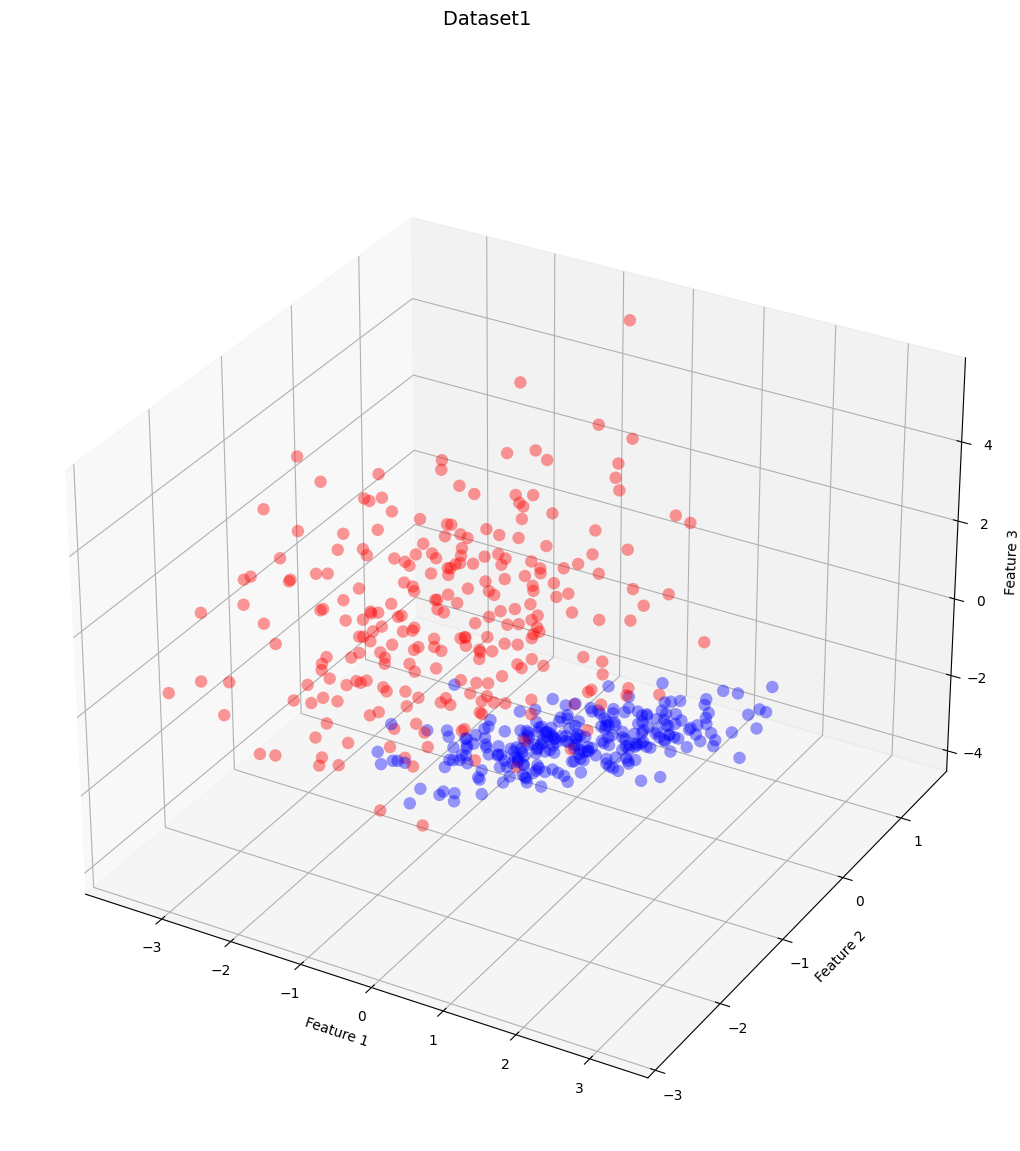

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16, 13))
t = fig.suptitle('Dataset1 ', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(x_data_1[:, 0])
ys = list(x_data_1[:, 1])
zs = list(x_data_1[:, 2])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 1 else 'blue' for wt in list(y_data_1)]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=80)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')


##Dataset 2
Binary classification, d = 4, N = 400

### Create dataset

In [ ]:
# Number of x attributes, d (dimensionality)
number_of_attributes = 2
# Number of samples, N
number_of_samples = 400
# Number of y labels
number_of_classes = 2
# Generate and save the data
#x_data_2, y_data_2 = skds.make_classification(n_samples = number_of_samples, n_features = number_of_attributes, n_classes = number_of_classes)
x_data_2, y_data_2 = skds.make_blobs(n_samples = number_of_samples, n_features = number_of_attributes, centers=2,cluster_std=1.5)
print(f"x_data_2:{x_data_2.shape}\n{x_data_2}\n\ny_data_2:{y_data_2.shape}\n{y_data_2}\n")

x_data_2:(400, 2)
[[-7.42749139e+00  6.58651126e+00]
 [-1.63555016e+00  3.22209760e+00]
 [-6.23010304e+00  7.35877303e+00]
 [-7.90567322e+00  1.09636632e+01]
 [-5.58698285e+00  7.95721651e+00]
 [-1.02263241e+01  6.91543512e+00]
 [-7.78490708e+00  9.17253585e+00]
 [-2.49518905e+00  5.40265823e+00]
 [-7.40329119e+00  5.75677161e+00]
 [-1.07675806e+01  9.24324784e+00]
 [-3.32271906e+00  5.08439255e+00]
 [-8.65855498e+00  7.93909498e+00]
 [-6.83903623e+00  8.21431568e+00]
 [-7.69670047e-01  5.10896804e+00]
 [-2.16872617e+00  5.89106688e+00]
 [-9.59818102e+00  8.69741525e+00]
 [-2.31396812e+00  5.20458099e+00]
 [-4.80671528e+00  3.17011281e+00]
 [-8.12572162e+00  4.40867223e+00]
 [-6.85175072e+00  9.66884311e+00]
 [-2.07112118e+00  6.16074018e+00]
 [-1.05832779e+01  1.13429153e+01]
 [ 2.49100051e-01  7.44315076e+00]
 [-3.11683198e+00  5.56651492e+00]
 [-1.54182225e+00  3.89528312e+00]
 [-2.64195860e+00  6.58302966e+00]
 [-8.10787624e+00  4.51287291e+00]
 [-4.80499662e+00  5.31850168e+00]
 [

Text(0, 0.5, 'feature 2')

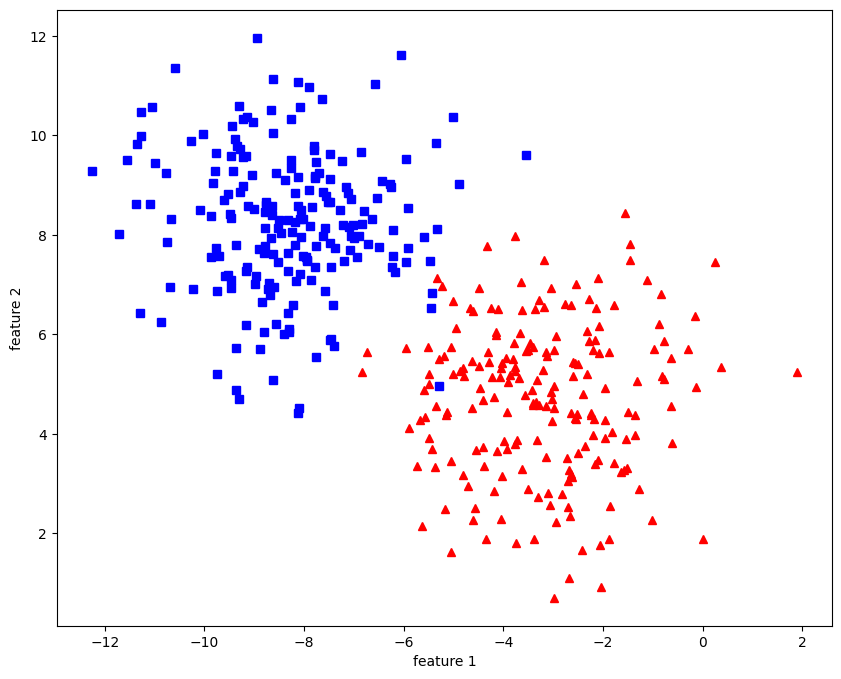

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(x_data_2[:, 0][y_data_2 == 0], x_data_2[:, 1][y_data_2 == 0], 'r^')
plt.plot(x_data_2[:, 0][y_data_2 == 1], x_data_2[:, 1][y_data_2 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

##Dataset 3
Linear Regression, d = 5, N = 500

###Create dataset

In [ ]:
# Number of x attributes, d (dimensionality)
number_of_attributes = 2
# Number of samples, N
number_of_samples = 50
# Generate and save the data
x_data_3, y_data_3 = skds.make_regression(n_samples = number_of_samples, n_features = number_of_attributes, )
print(f"x_data_3:{x_data_3.shape}\n{x_data_3}\n\ny_data_3:{y_data_3.shape}\n{y_data_3}\n")

x_data_3:(50, 2)
[[-0.18780605 -0.46590113]
 [-0.39359992 -0.48039729]
 [-0.54444092  0.42535721]
 [ 0.8467309   0.89606521]
 [-1.45201719 -1.01049126]
 [-0.00580438 -0.97637485]
 [-0.62854755 -1.74830868]
 [ 0.70203719 -1.0320591 ]
 [-0.71023208 -1.06818056]
 [-0.17207042  1.12719987]
 [-0.08994893  0.45722761]
 [-0.56561412  0.28624409]
 [ 0.0516556  -0.65353127]
 [-1.44257038 -0.53370819]
 [-0.223119   -1.26389667]
 [-0.80503342 -1.58104158]
 [-1.15583026 -1.59085653]
 [-0.39644199 -0.22980525]
 [ 0.24716982  0.65451652]
 [ 0.58875079  0.63947546]
 [-0.02304554 -0.45849081]
 [-0.58605215  0.58183772]
 [ 0.06112203  1.71233202]
 [ 1.07892452 -0.47202308]
 [ 0.01293329  2.14831642]
 [-0.2059756   2.55353343]
 [ 0.61415631 -1.81898479]
 [ 0.45877934 -1.72197043]
 [ 0.56062117  0.33325965]
 [-0.25784869 -0.62102203]
 [-0.11510899 -0.44689983]
 [-0.60984507 -1.209493  ]
 [ 0.73345402 -1.60836962]
 [-0.07891844  0.19210588]
 [-0.53349185 -0.57836679]
 [ 0.71394126 -0.62403947]
 [ 0.967201

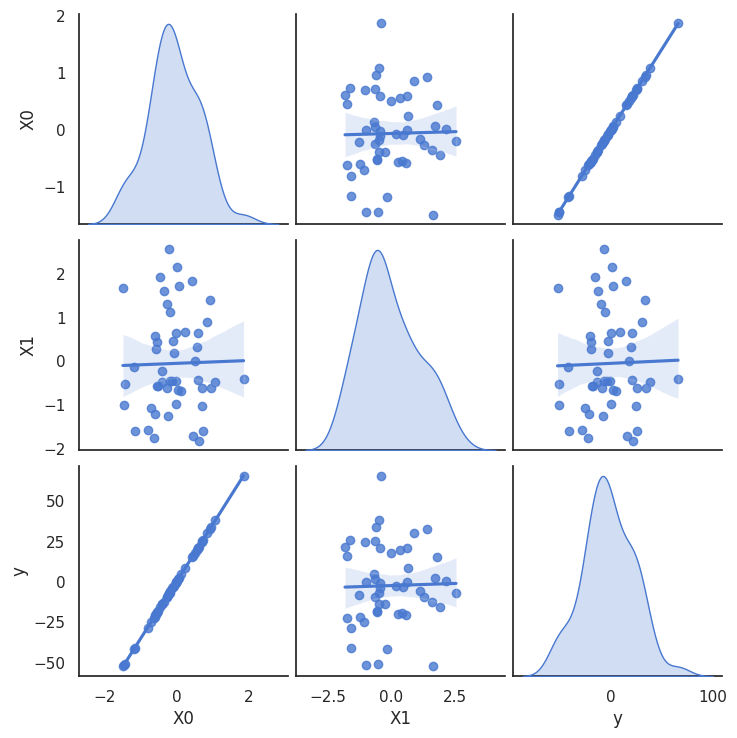

In [ ]:
import seaborn as sns

# Create a DataFrame for Seaborn plotting
import pandas as pd
data = pd.DataFrame(data=np.concatenate((x_data_3, y_data_3.reshape(-1, 1)), axis=1),
                    columns=[f'X{i}' for i in range(number_of_attributes)] + ['y'])

# Plot regression subplots using Seaborn
sns.set(style="white", palette="muted", color_codes=True)
sns.pairplot(data, kind="reg", diag_kind="kde", markers="o", height=2.5)
plt.show()


##Dataset 4
Linear Regression, d = 4, N = 400

### Create dataset

In [ ]:
# Number of x attributes, d (dimensionality)
number_of_attributes = 4
# Number of samples, N
number_of_samples = 400
# Generate and save the data
x_data_4, y_data_4 = skds.make_regression(n_samples = number_of_samples, n_features = number_of_attributes)
print(f"x_data_4:{x_data_4.shape}\n{x_data_4}\n\ny_data_4:{y_data_4.shape}\n{y_data_4}\n")

x_data_4:(400, 4)
[[-1.62506231 -2.08948407  0.11067506 -1.43795541]
 [ 1.0016353  -0.38005933 -1.48128586 -0.090037  ]
 [ 0.17900838  0.56330226  1.14471468  1.25731675]
 ...
 [-1.0365815  -0.20769538 -1.96428092  0.11032714]
 [ 0.71425266 -0.8421564  -0.39369949  1.24138861]
 [ 3.25721279 -0.42947469 -1.05696907  0.52756626]]

y_data_4:(400,)
[-181.74982189  -59.09447351  173.7850044   -85.33195942    3.00282566
  -16.75692791  130.30363452  173.91063251   26.05129599 -111.9959109
   -3.17056271   55.0009572  -101.63366801  -34.31193932  -18.98902893
  -93.39247379 -151.45453686   53.61852749   74.96775485   46.87954161
   91.73404249  -50.38021176  -77.31234815   50.37485748  -51.05881572
  -14.99599917  -38.32960756  235.03270621   -3.19880125   53.46540766
  -81.00366399  -58.14831029  113.25236779   95.44137462  -25.23461394
  -58.4443045   139.35085586  -24.58336345  -85.27103391  -78.75232274
   61.65071049 -238.42635846 -121.18446887  177.35002551  -89.56365615
  -75.16669468 

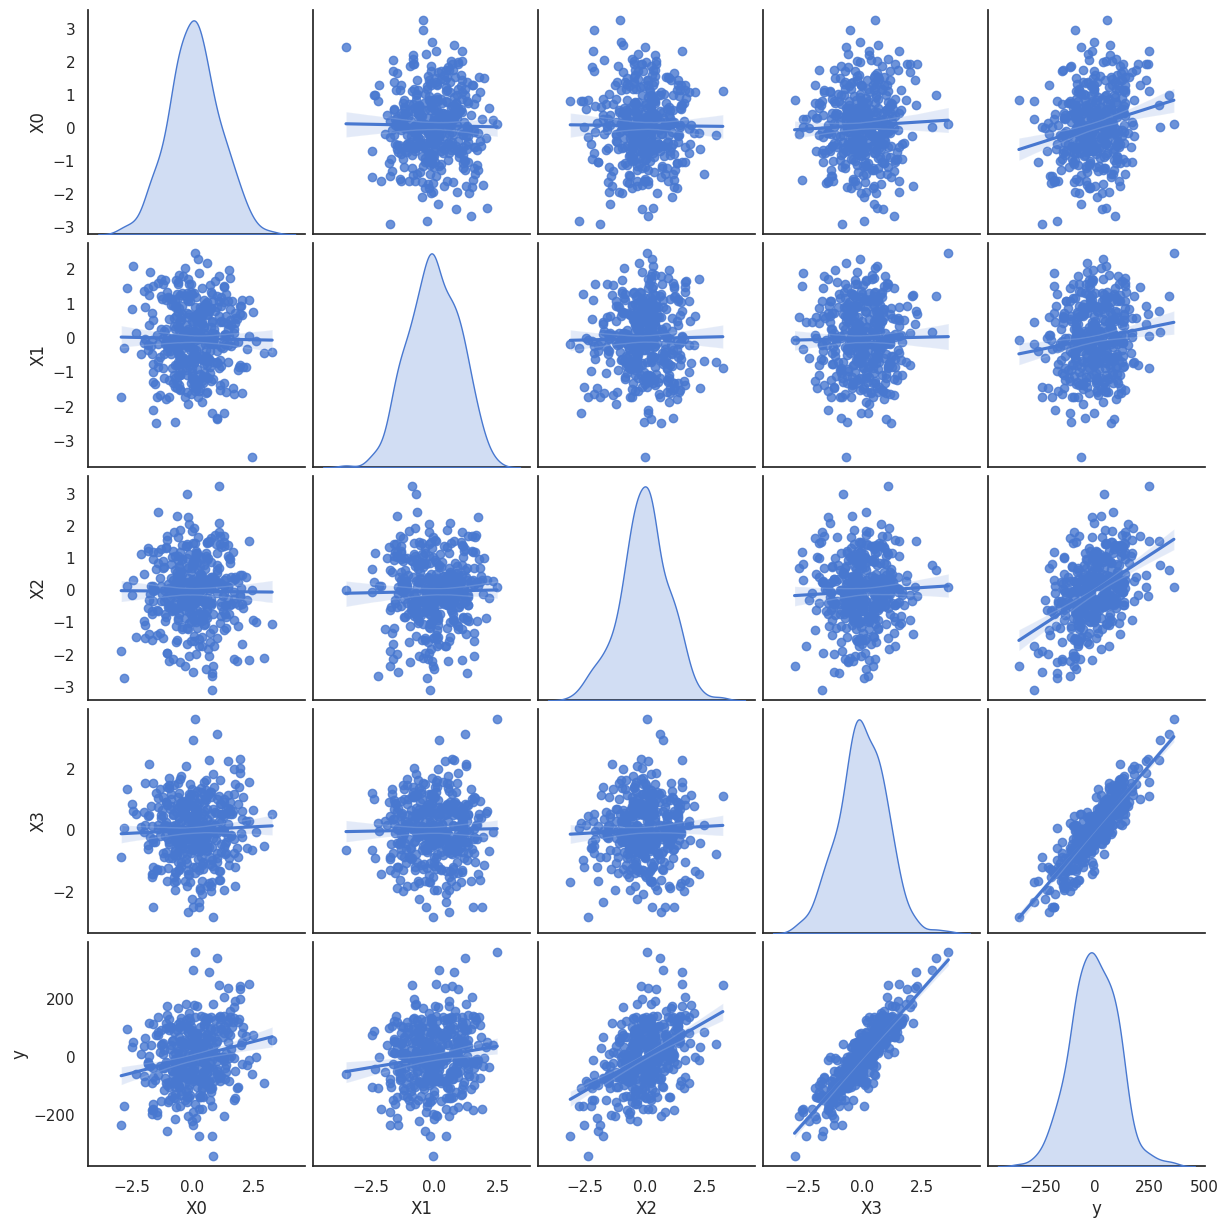

In [ ]:
import seaborn as sns

# Create a DataFrame for Seaborn plotting
import pandas as pd
data = pd.DataFrame(data=np.concatenate((x_data_4, y_data_4.reshape(-1, 1)), axis=1),
                    columns=[f'X{i}' for i in range(number_of_attributes)] + ['y'])

# Plot regression subplots using Seaborn
sns.set(style="white", palette="muted", color_codes=True)
sns.pairplot(data, kind="reg", diag_kind="kde", markers="o", height=2.5)
plt.show()


##Dataset 5
Classification, d = 3, N = 4653

Source: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot
0               3   34                          0           0
1               1   28                          3           1
2               3   38                          2           0
3               3   27                          5           1
4               3   24                          2           1
...           ...  ...                        ...         ...
4648            3   26                          4           0
4649            2   37                          2           1
4650            3   27                          5           1
4651            3   30                          2           0
4652            3   33                          4           0

[4653 rows x 4 columns]
[[ 3 34  0]
 [ 1 28  3]
 [ 3 38  2]
 ...
 [ 3 27  5]
 [ 3 30  2]
 [ 3 33  4]]


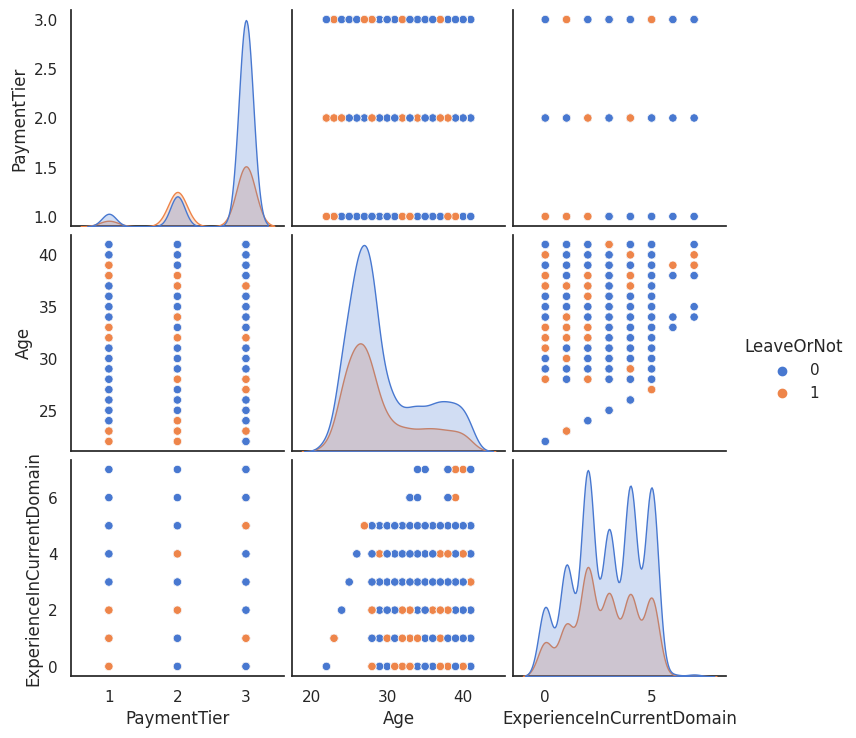

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Path to the CSV file in Google Drive
file_path = '/content/drive/MyDrive/Employee.csv'
df = pd.read_csv(file_path)
columns_to_drop = ['Education', 'JoiningYear', 'City','Gender','EverBenched']
df.drop(columns=columns_to_drop, inplace=True)
print(df)

df2 = df.drop(columns = 'LeaveOrNot')
x_data_5 = df2.to_numpy()
y_data_5 = df['LeaveOrNot'].to_numpy()
print(x_data_5)
sns.pairplot(df, hue='LeaveOrNot', diag_kind='kde')
plt.show()

Experiment with the data sets:

Classification

In [ ]:
print('DataSet 1:')
weight_vector = run_pocket(x_dataset=x_data_1, y_dataset=y_data_1)
print(weight_vector)
print('\n')

print('DataSet 2:')
weight_vector = run_pocket(x_dataset=x_data_2, y_dataset=y_data_2)
print(weight_vector)
print('\n')

print('DataSet 5:')
weight_vector = run_pocket(x_dataset=x_data_5, y_dataset=y_data_5)
print(weight_vector)
print('\n')

DataSet 1:
[[ 1.        ]
 [-0.03886131]
 [-0.5575311 ]
 [ 0.58166446]]


DataSet 2:
[[ 1.        ]
 [-5.58698285]
 [ 7.95721651]]


DataSet 5:
[[ 1.]
 [ 3.]
 [29.]
 [ 1.]]




Regression

In [ ]:
print('DataSet 3: ')
reg_obj, coefficients, intercept = run_linear_regression(x_dataset = x_data_3, y_dataset = y_data_3)

print(reg_obj)
print(coefficients)
print(intercept)
print('\n')

print('DataSet 4: ')
reg_obj, coefficients, intercept = run_linear_regression(x_dataset = x_data_4, y_dataset = y_data_4)

print(reg_obj)
print(coefficients)
print(intercept)

DataSet 3: 
LinearRegression()
[35.22071533  0.08034337]
0.0


DataSet 4: 
LinearRegression()
[18.63025225 12.87582819 43.71790286 89.99524163]
-1.9984014443252818e-15
